In [4]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import matplotlib.pyplot as plt
import numpy as np
import statistics as stat
import ipywidgets as widgets
from IPython.display import display
from enhancement_analysis import *
from fit_functions import *
from low_level import readCSVrows,writeCSVrows,calcEnhancement,readCSVcolumns
%matplotlib inline


In [6]:
results=readCSVcolumns('Processed_20190424/metadata_enhancement_PVOH_0425.csv',skip_header=1)
header = results[1]
print(header)
[iv,starts,stops]= results[0]

Done! Array read from Processed_20190424/metadata_enhancement_PVOH_0425.csv
[['Parameters', 'Start File', 'Stop File']]


A Jupyter Widget

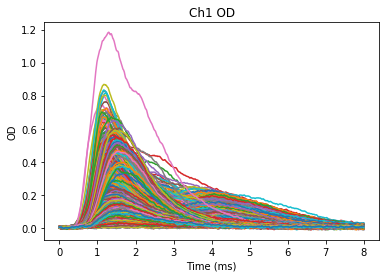

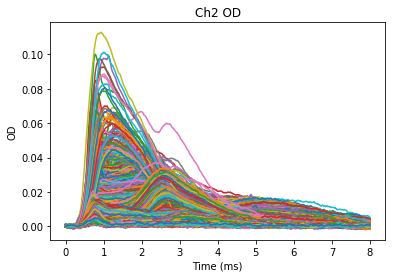

In [11]:
folder = '20190424'
skips = []
ABAB = True

start_arr = starts.astype(int)
stop_arr = stops.astype(int)
iv_arr = iv

enhancement = []

b_ODs = []
ub_ODs = []
b_int = []
ub_int = []

progress = widgets.FloatProgress(value=0.0, min=0.0, max=1.0)
display(progress)

for _start,_stop,i in zip(start_arr,stop_arr,range(0,len(start_arr)*3,3)):
    
    ODs_1 = calculateSeriesOD(folder,_start,_stop,skips,ABAB=ABAB)
    int_1 = processData(ODs_1,[0,8])
    progress.value = float(i/(len(start_arr)*3))
    i+=1
    ODs_2 = calculateSeriesOD(folder,_start+1,_stop,skips,ABAB=ABAB)
    int_2 = processData(ODs_2,[0,8])
    progress.value = float(i/(len(start_arr)*3))
    i+=1
    b,ub,firstBlocked = identifyBUB(int_1,int_2,ch=1,equal=True,returnBool=True)
    b_int.append(b)
    ub_int.append(ub)
    if firstBlocked:
        b_ODs.append(ODs_1)
        ub_ODs.append(ODs_2)
    else:
        b_ODs.append(ODs_2)
        ub_ODs.append(ODs_1)
    progress.value = float(i/(len(start_arr)*3))
    i+=1
progress.value=1

#ODs = [Ch1 ODs, Ch 2 ODs, params]
#int = [Ch1 Integrated, Ch2 Integrated, Timestamp]

In [278]:
all_1 = [iv, b_ODs, ub_ODs, b_int, ub_int]

In [257]:
[iv, b_ODs, ub_ODs, b_int, ub_int] = all_1

In [12]:
en_ch1 = []
en_ch2 = []
for _b,_ub in zip(b_int,ub_int):
    _en1 = calcEnhancement(_b[0],_ub[0])
    en_ch1.append(_en1)
    _en2 = calcEnhancement(_b[1],_ub[1])
    en_ch2.append(_en2)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


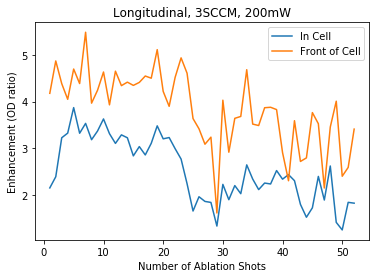

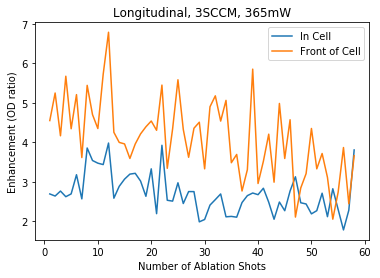

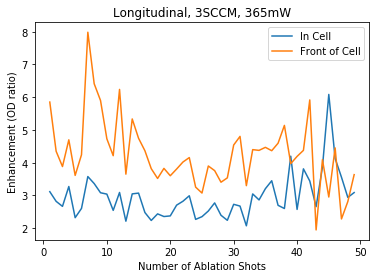

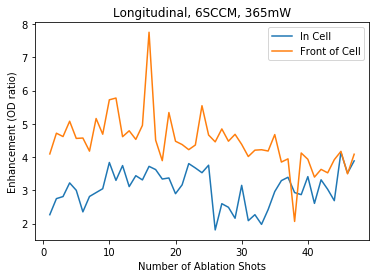

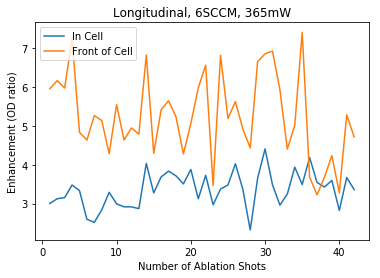

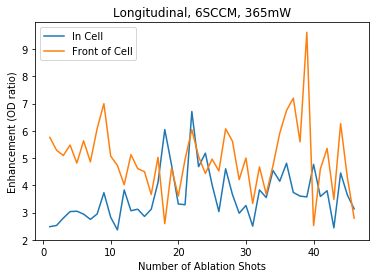

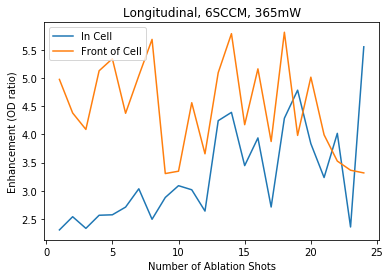

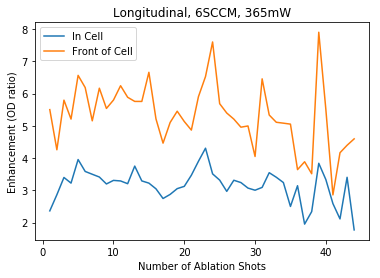

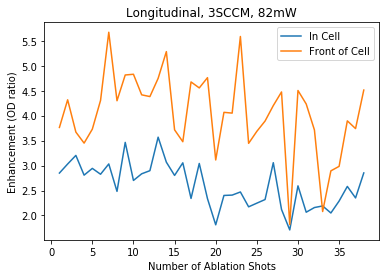

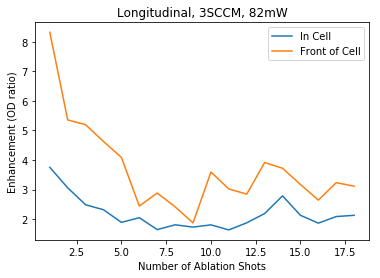

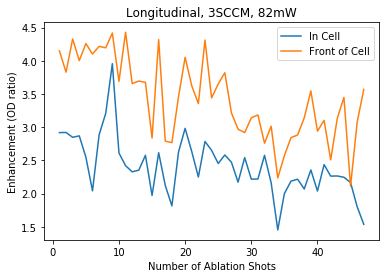

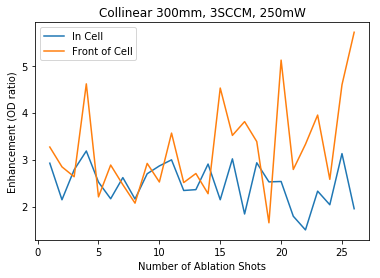

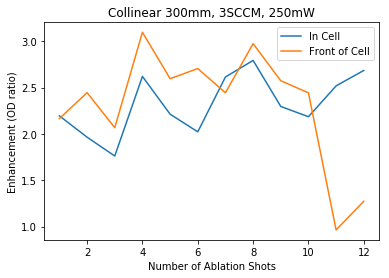

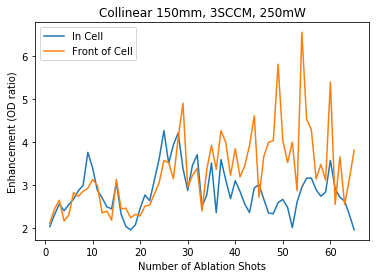

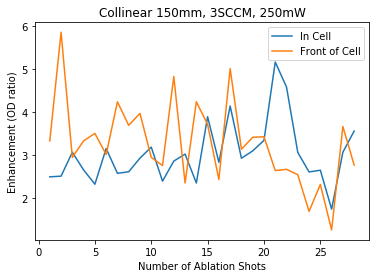

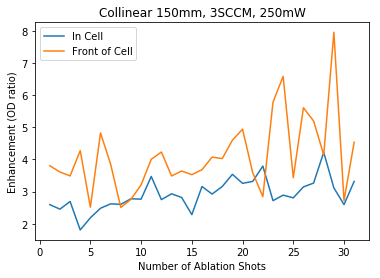

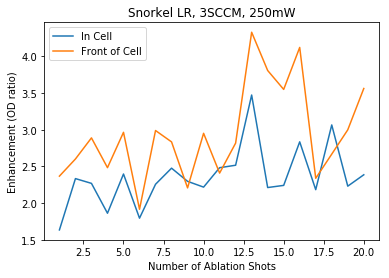

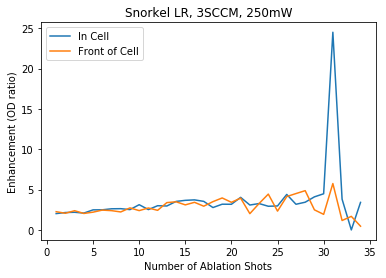

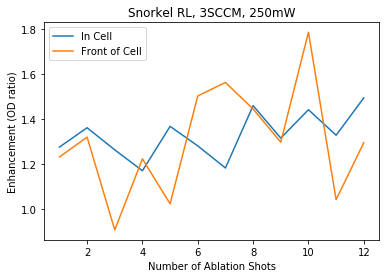

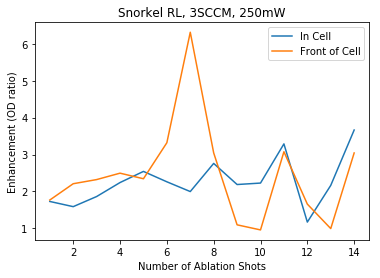

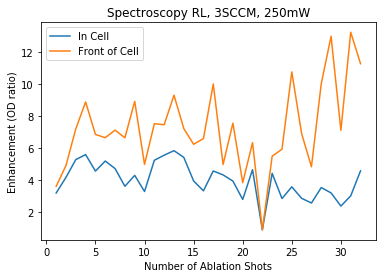

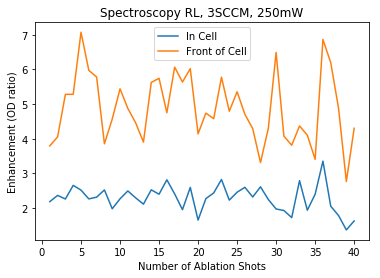

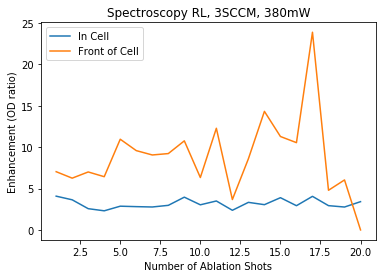

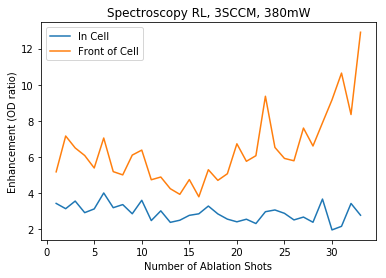

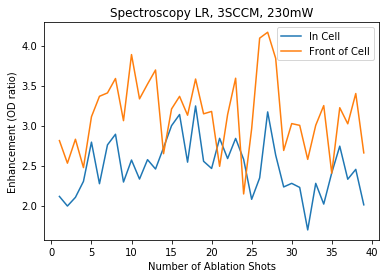

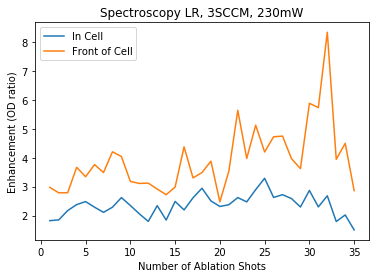

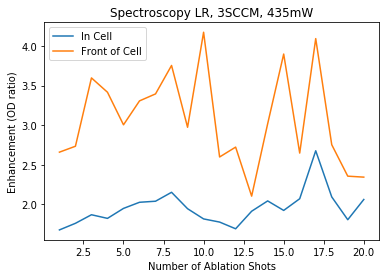

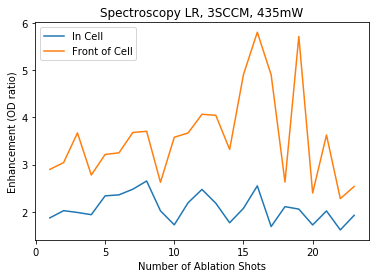

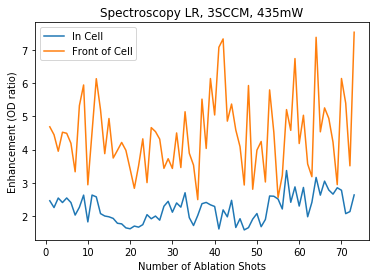

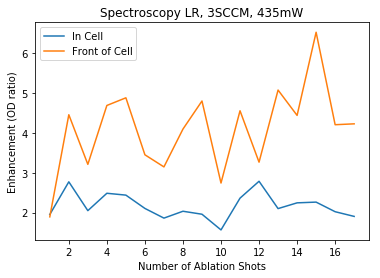

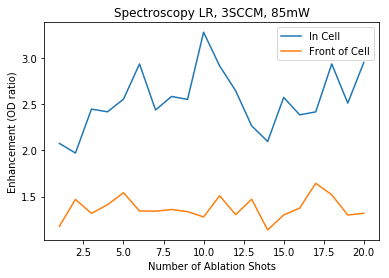

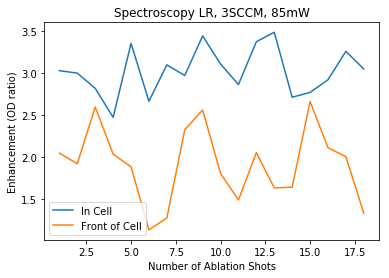

In [13]:
cell = []
err_cell = []
front = []
err_front = []
for _en1,_en2,_iv in zip(en_ch1,en_ch2,iv):
    plt.figure()
    x = np.arange(1,len(_en1)+1)
    plt.title('{}'.format(_iv))
    plt.ylabel('Enhancement (OD ratio)')
    plt.xlabel('Number of Ablation Shots')
    plt.plot(x,_en1,label='In Cell')
    plt.plot(x,_en2,label='Front of Cell')
    plt.legend(loc='best')
    cell.append(np.array(_en1).mean())
    err_cell.append(np.array(_en1).std())
    front.append(np.array(_en2).mean())
    err_front.append(np.array(_en2).std())

In [14]:
results=readCSVcolumns('Processed_20190424/metadata_enhancement_PVOH_0424.csv',skip_header=1)
header = results[1]
print(header)
[iv,starts,stops]= results[0]

Done! Array read from Processed_20190424/metadata_enhancement_PVOH_0424.csv
[['Parameters', 'Start File', 'Stop File']]


A Jupyter Widget

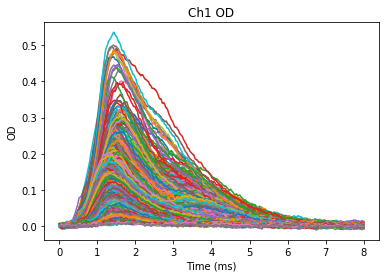

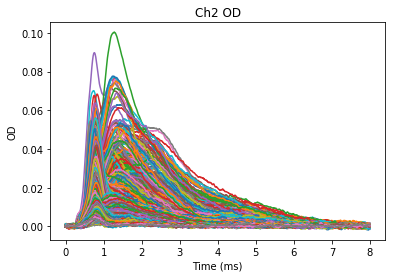

In [15]:
folder = '20190424'
skips = []
ABAB = True

start_arr = starts.astype(int)
stop_arr = stops.astype(int)
iv_arr = iv

enhancement = []

b_ODs = []
ub_ODs = []
b_int = []
ub_int = []

progress = widgets.FloatProgress(value=0.0, min=0.0, max=1.0)
display(progress)

for _start,_stop,i in zip(start_arr,stop_arr,range(0,len(start_arr)*3,3)):
    
    ODs_1 = calculateSeriesOD(folder,_start,_stop,skips,ABAB=ABAB)
    int_1 = processData(ODs_1,[0,8])
    progress.value = float(i/(len(start_arr)*3))
    i+=1
    ODs_2 = calculateSeriesOD(folder,_start+1,_stop,skips,ABAB=ABAB)
    int_2 = processData(ODs_2,[0,8])
    progress.value = float(i/(len(start_arr)*3))
    i+=1
    b,ub,firstBlocked = identifyBUB(int_1,int_2,ch=1,equal=True,returnBool=True)
    b_int.append(b)
    ub_int.append(ub)
    if firstBlocked:
        b_ODs.append(ODs_1)
        ub_ODs.append(ODs_2)
    else:
        b_ODs.append(ODs_2)
        ub_ODs.append(ODs_1)
    progress.value = float(i/(len(start_arr)*3))
    i+=1
progress.value=1

#ODs = [Ch1 ODs, Ch 2 ODs, params]
#int = [Ch1 Integrated, Ch2 Integrated, Timestamp]

In [17]:
en_ch1 = []
en_ch2 = []
for _b,_ub in zip(b_int,ub_int):
    _en1 = calcEnhancement(_b[0],_ub[0])
    en_ch1.append(_en1)
    _en2 = calcEnhancement(_b[1],_ub[1])
    en_ch2.append(_en2)

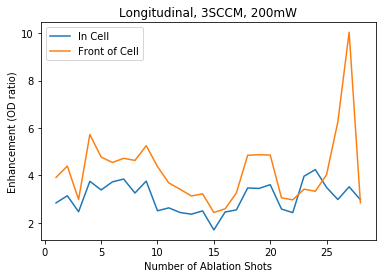

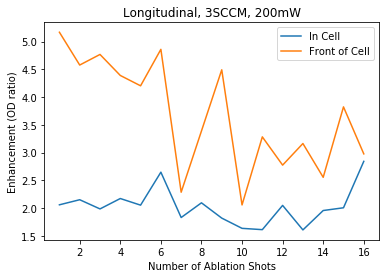

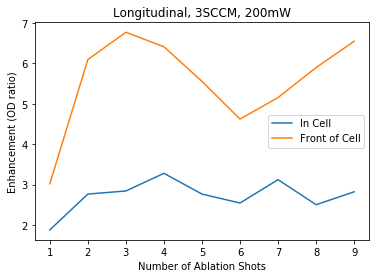

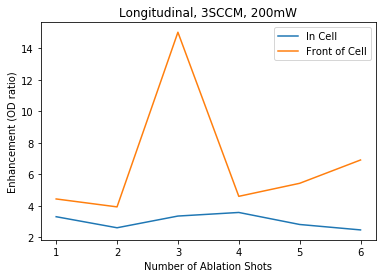

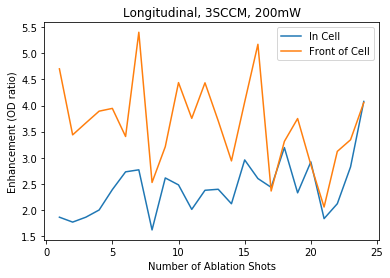

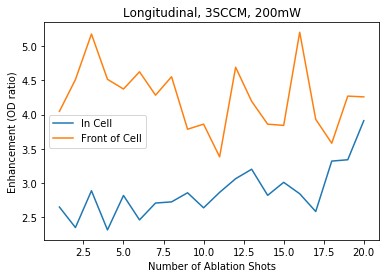

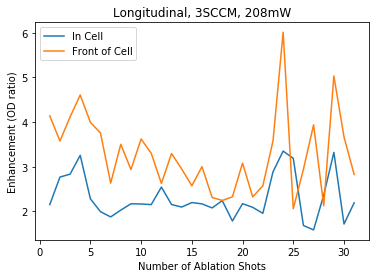

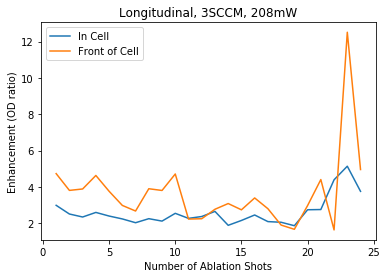

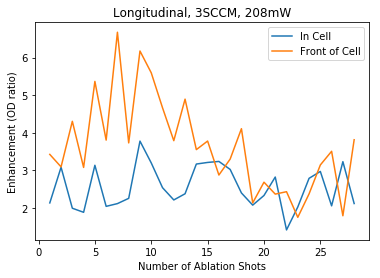

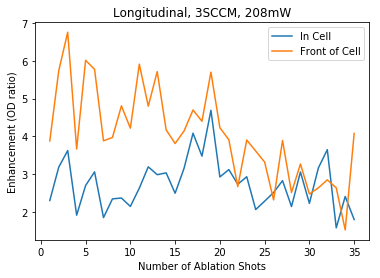

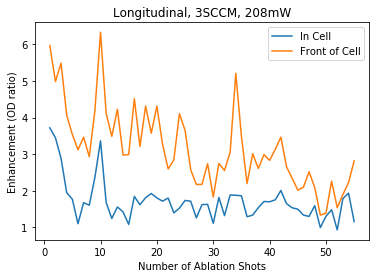

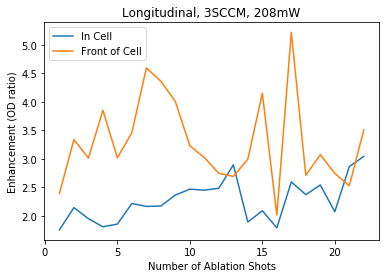

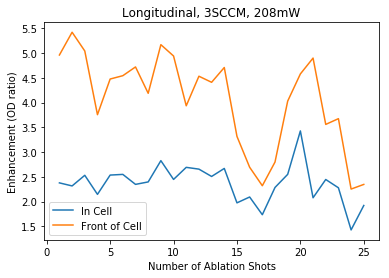

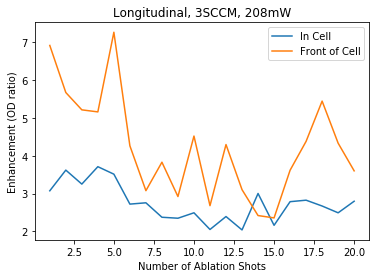

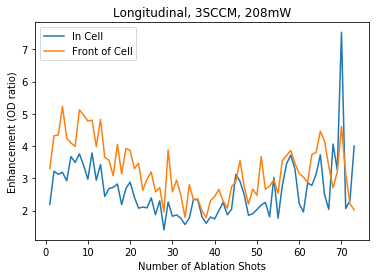

In [18]:
cell = []
err_cell = []
front = []
err_front = []
for _en1,_en2,_iv in zip(en_ch1,en_ch2,iv):
    plt.figure()
    x = np.arange(1,len(_en1)+1)
    plt.title('{}'.format(_iv))
    plt.ylabel('Enhancement (OD ratio)')
    plt.xlabel('Number of Ablation Shots')
    plt.plot(x,_en1,label='In Cell')
    plt.plot(x,_en2,label='Front of Cell')
    plt.legend(loc='best')
    cell.append(np.array(_en1).mean())
    err_cell.append(np.array(_en1).std())
    front.append(np.array(_en2).mean())
    err_front.append(np.array(_en2).std())

In [2]:
results=readCSVcolumns('Processed_20190424/metadata_enhancement_PVOH_0429.csv',skip_header=1)
header = results[1]
print(header)
[iv,starts,stops]= results[0]

Done! Array read from Processed_20190424/metadata_enhancement_PVOH_0429.csv
[['Parameters', 'Start File', 'Stop File']]


A Jupyter Widget

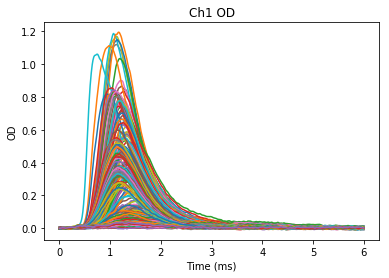

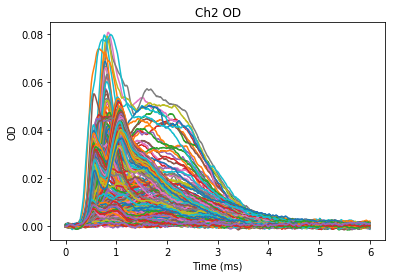

In [5]:
folder = '20190424'
skips = []
ABAB = True

start_arr = starts.astype(int)
stop_arr = stops.astype(int)
iv_arr = iv

enhancement = []

b_ODs = []
ub_ODs = []
b_int = []
ub_int = []

progress = widgets.FloatProgress(value=0.0, min=0.0, max=1.0)
display(progress)

for _start,_stop,i in zip(start_arr,stop_arr,range(0,len(start_arr)*3,3)):
    
    ODs_1 = calculateSeriesOD(folder,_start,_stop,skips,ABAB=ABAB)
    int_1 = processData(ODs_1,[0,6])
    progress.value = float(i/(len(start_arr)*3))
    i+=1
    ODs_2 = calculateSeriesOD(folder,_start+1,_stop,skips,ABAB=ABAB)
    int_2 = processData(ODs_2,[0,6])
    progress.value = float(i/(len(start_arr)*3))
    i+=1
    b,ub,firstBlocked = identifyBUB(int_1,int_2,ch=1,equal=True,returnBool=True)
    b_int.append(b)
    ub_int.append(ub)
    if firstBlocked:
        b_ODs.append(ODs_1)
        ub_ODs.append(ODs_2)
    else:
        b_ODs.append(ODs_2)
        ub_ODs.append(ODs_1)
    progress.value = float(i/(len(start_arr)*3))
    i+=1
progress.value=1

#ODs = [Ch1 ODs, Ch 2 ODs, params]
#int = [Ch1 Integrated, Ch2 Integrated, Timestamp]

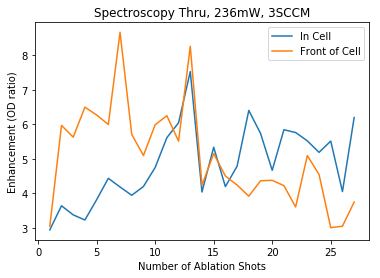

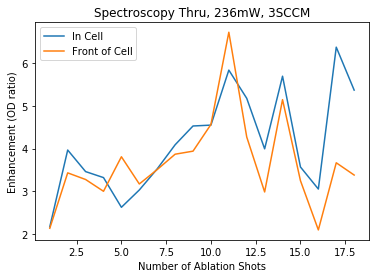

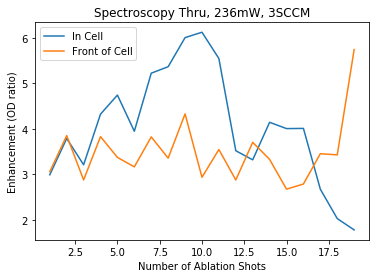

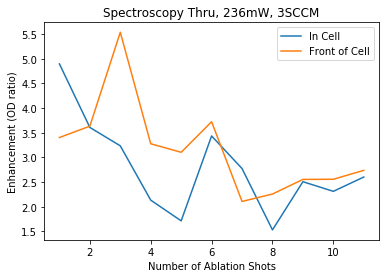

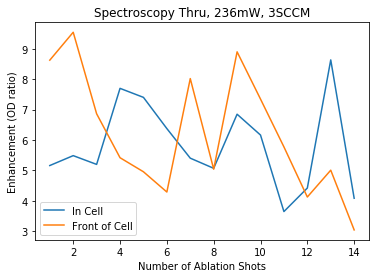

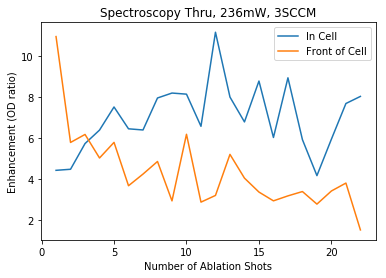

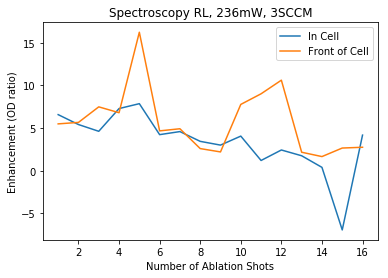

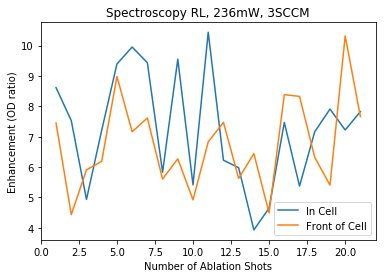

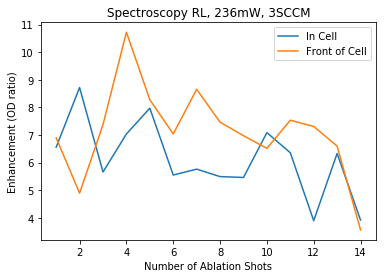

In [4]:
en_ch1 = []
en_ch2 = []
for _b,_ub in zip(b_int,ub_int):
    _en1 = calcEnhancement(_b[0],_ub[0])
    en_ch1.append(_en1)
    _en2 = calcEnhancement(_b[1],_ub[1])
    en_ch2.append(_en2)

cell = []
err_cell = []
front = []
err_front = []
for _en1,_en2,_iv in zip(en_ch1,en_ch2,iv):
    plt.figure()
    x = np.arange(1,len(_en1)+1)
    plt.title('{}'.format(_iv))
    plt.ylabel('Enhancement (OD ratio)')
    plt.xlabel('Number of Ablation Shots')
    plt.plot(x,_en1,label='In Cell')
    plt.plot(x,_en2,label='Front of Cell')
    plt.legend(loc='best')
    cell.append(np.array(_en1).mean())
    err_cell.append(np.array(_en1).std())
    front.append(np.array(_en2).mean())
    err_front.append(np.array(_en2).std())

In [8]:
results=readCSVcolumns('Processed_20190424/metadata_enhancement_10pYb_0501.csv',skip_header=1)
header = results[1]
print(header)
[iv,starts,stops]= results[0]

Done! Array read from Processed_20190424/metadata_enhancement_10pYb_0501.csv
[['Parameters', 'Start File', 'Stop File']]


A Jupyter Widget

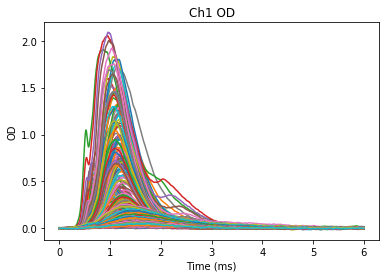

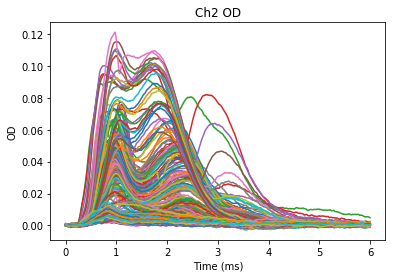

In [9]:
folder = '20190424'
skips = []
ABAB = True

start_arr = starts.astype(int)
stop_arr = stops.astype(int)
iv_arr = iv

enhancement = []

b_ODs = []
ub_ODs = []
b_int = []
ub_int = []

progress = widgets.FloatProgress(value=0.0, min=0.0, max=1.0)
display(progress)

for _start,_stop,i in zip(start_arr,stop_arr,range(0,len(start_arr)*3,3)):
    
    ODs_1 = calculateSeriesOD(folder,_start,_stop,skips,ABAB=ABAB)
    int_1 = processData(ODs_1,[0,6])
    progress.value = float(i/(len(start_arr)*3))
    i+=1
    ODs_2 = calculateSeriesOD(folder,_start+1,_stop,skips,ABAB=ABAB)
    int_2 = processData(ODs_2,[0,6])
    progress.value = float(i/(len(start_arr)*3))
    i+=1
    b,ub,firstBlocked = identifyBUB(int_1,int_2,ch=1,equal=True,returnBool=True)
    b_int.append(b)
    ub_int.append(ub)
    if firstBlocked:
        b_ODs.append(ODs_1)
        ub_ODs.append(ODs_2)
    else:
        b_ODs.append(ODs_2)
        ub_ODs.append(ODs_1)
    progress.value = float(i/(len(start_arr)*3))
    i+=1
progress.value=1

#ODs = [Ch1 ODs, Ch 2 ODs, params]
#int = [Ch1 Integrated, Ch2 Integrated, Timestamp]

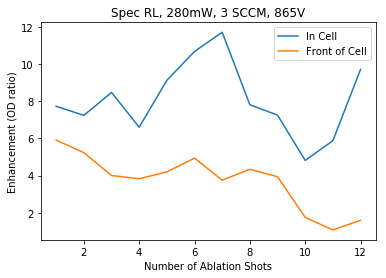

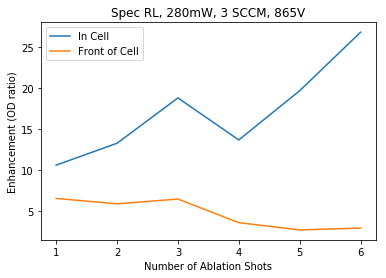

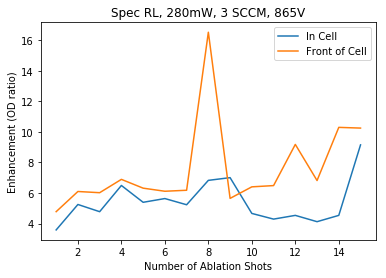

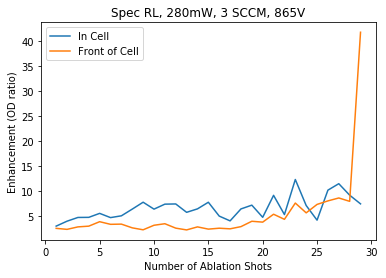

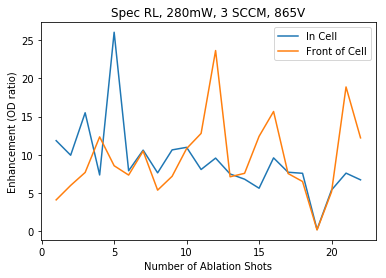

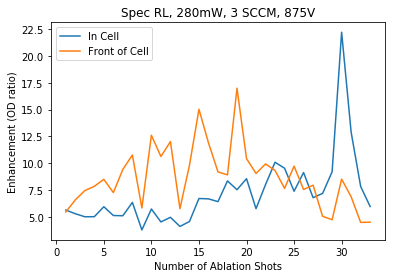

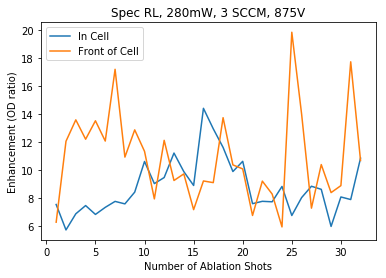

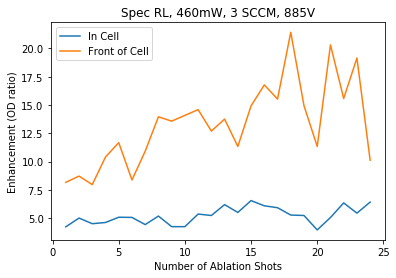

In [10]:
en_ch1 = []
en_ch2 = []
for _b,_ub in zip(b_int,ub_int):
    _en1 = calcEnhancement(_b[0],_ub[0])
    en_ch1.append(_en1)
    _en2 = calcEnhancement(_b[1],_ub[1])
    en_ch2.append(_en2)

cell = []
err_cell = []
front = []
err_front = []
for _en1,_en2,_iv in zip(en_ch1,en_ch2,iv):
    plt.figure()
    x = np.arange(1,len(_en1)+1)
    plt.title('{}'.format(_iv))
    plt.ylabel('Enhancement (OD ratio)')
    plt.xlabel('Number of Ablation Shots')
    plt.plot(x,_en1,label='In Cell')
    plt.plot(x,_en2,label='Front of Cell')
    plt.legend(loc='best')
    cell.append(np.array(_en1).mean())
    err_cell.append(np.array(_en1).std())
    front.append(np.array(_en2).mean())
    err_front.append(np.array(_en2).std())

In [5]:
results=readCSVcolumns('Processed_20190424/metadata_enhancement_stoichiometric_0501.csv',skip_header=1)
header = results[1]
print(header)
[iv,starts,stops]= results[0]

Done! Array read from Processed_20190424/metadata_enhancement_stoichiometric_0501.csv
[['Power (mW)', 'Start', 'Stop']]


A Jupyter Widget

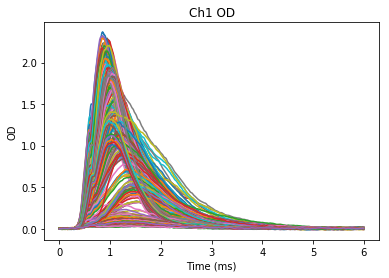

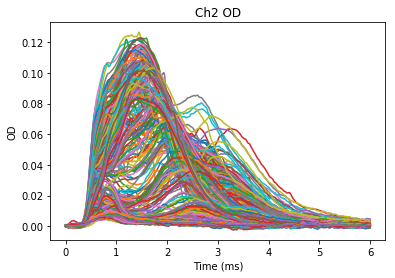

In [6]:
folder = '20190424'
skips = []
ABAB = True

start_arr = starts.astype(int)
stop_arr = stops.astype(int)
iv_arr = iv

enhancement = []

b_ODs = []
ub_ODs = []
b_int = []
ub_int = []

progress = widgets.FloatProgress(value=0.0, min=0.0, max=1.0)
display(progress)

for _start,_stop,i in zip(start_arr,stop_arr,range(0,len(start_arr)*3,3)):
    
    ODs_1 = calculateSeriesOD(folder,_start,_stop,skips,ABAB=ABAB)
    int_1 = processData(ODs_1,[0,6])
    progress.value = float(i/(len(start_arr)*3))
    i+=1
    ODs_2 = calculateSeriesOD(folder,_start+1,_stop,skips,ABAB=ABAB)
    int_2 = processData(ODs_2,[0,6])
    progress.value = float(i/(len(start_arr)*3))
    i+=1
    b,ub,firstBlocked = identifyBUB(int_1,int_2,ch=1,equal=True,returnBool=True)
    b_int.append(b)
    ub_int.append(ub)
    if firstBlocked:
        b_ODs.append(ODs_1)
        ub_ODs.append(ODs_2)
    else:
        b_ODs.append(ODs_2)
        ub_ODs.append(ODs_1)
    progress.value = float(i/(len(start_arr)*3))
    i+=1
progress.value=1

#ODs = [Ch1 ODs, Ch 2 ODs, params]
#int = [Ch1 Integrated, Ch2 Integrated, Timestamp]

In [15]:
len(ub_ODs[0])

3

[[7, 3], [7, 4], [7, 7], [14, 5], [14, 7], [14, 10]]


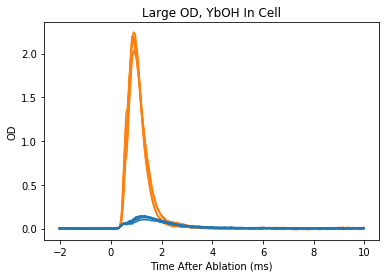

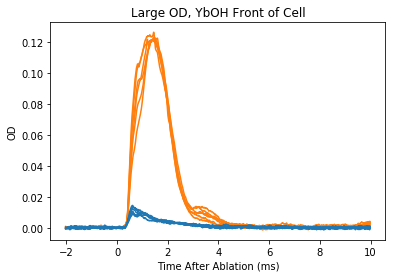

In [60]:
from low_level import timeArray

ub_big = []
idx = []
time_ms = []
plt.figure(1)
plt.title('Large OD, YbOH In Cell')
plt.xlabel('Time After Ablation (ms)')
plt.ylabel('OD')
plt.figure(2)
plt.title('Large OD, YbOH Front of Cell')
plt.xlabel('Time After Ablation (ms)')
plt.ylabel('OD')

for i in range(len(ub_ODs)):
    _ub_ch1 = ub_ODs[i][0]
    _ub_ch2 = ub_ODs[i][1]
    _p = ub_ODs[i][2]
    for j in range(len(_ub_ch1)):
        _trace_ch1 = _ub_ch1[j]
        _trace_ch2 = _ub_ch2[j]
        _time = timeArray(_p[j])
        if _trace_ch1.max()>2.4 or _trace_ch2.max()>0.12:
            ub_big.append([_trace_ch1,_trace_ch2])
            time_ms.append(_time)
            idx.append([i,j])
            plt.figure(1)
            plt.plot(_time,_trace_ch1,color='C1')
            plt.figure(2)
            plt.plot(_time,_trace_ch2,color='C1')
b_big = []
for _idx,k in zip(idx,range(len(idx))):
    [i,j] = _idx
    b_big.append([b_ODs[i][0][j],b_ODs[i][1][j]])
    plt.figure(1)
    plt.plot(time_ms[k],b_ODs[i][0][j],color='C0')
    plt.figure(2)
    plt.plot(time_ms[k],b_ODs[i][1][j],color='C0')
    
ub_big = np.array(ub_big)
b_big = np.array(b_big)
time_ms = np.array(time_ms)
print(idx)    

In [55]:
for t in time_ms:
    print(t[-1])

9.9744
9.9744
9.9744
9.9744
9.9744
9.9744


In [63]:
bub_data = [[],[],[],[]]
for _ub,_b in zip(ub_big,b_big):
    bub_data[0].append(_b[0])
    bub_data[1].append(_b[1])
    bub_data[2].append(_ub[0])
    bub_data[3].append(_ub[1])

In [58]:
powers = []
for _idx in idx:
    powers.append(iv[_idx[0]])

In [65]:
t = time_ms[0]
for i in range(len(idx)):
    lbls = ['Time (ms)', 'In Cell OD Blocked','Front of Cell OD Blocked','In Cell OD Unblocked','Front of Cell OD Unblocked']
    data = np.array([np.array(t),np.array(bub_data[0][i]),np.array(bub_data[1][i]),np.array(bub_data[2][i]),np.array(bub_data[3][i])])
    save_all = []
    save_all.append(lbls)
    for _data in data.T:
        save_all.append(_data)
    writeCSVrows(save_all,'Processed_20190424/Large_OD_P{}mW_{}.csv'.format(powers[i],i))

Done! Array written to Processed_20190424/Large_OD_P417.0mW_0.csv
Done! Array written to Processed_20190424/Large_OD_P417.0mW_1.csv
Done! Array written to Processed_20190424/Large_OD_P417.0mW_2.csv
Done! Array written to Processed_20190424/Large_OD_P431.0mW_3.csv
Done! Array written to Processed_20190424/Large_OD_P431.0mW_4.csv
Done! Array written to Processed_20190424/Large_OD_P431.0mW_5.csv


D:\Anaconda3\lib\site-packages\matplotlib\pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


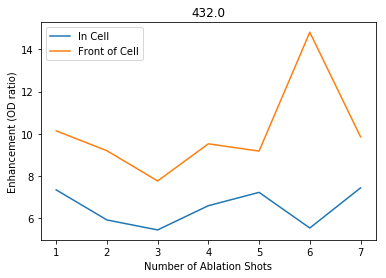

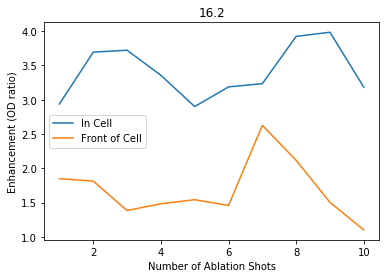

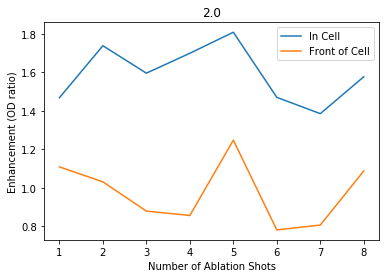

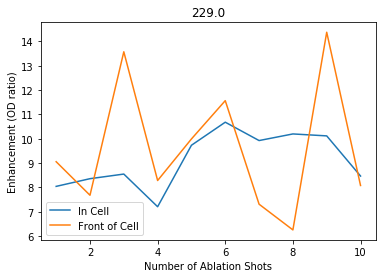

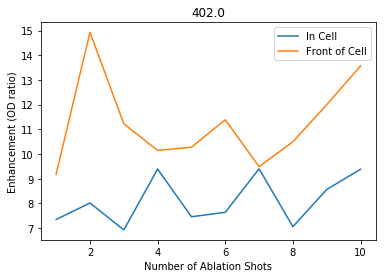

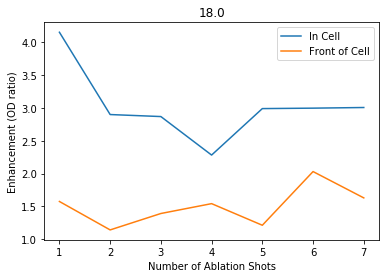

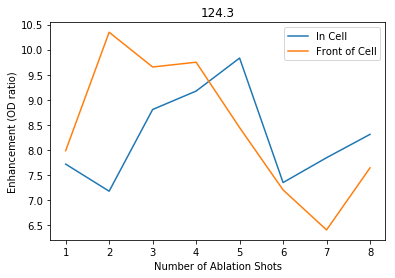

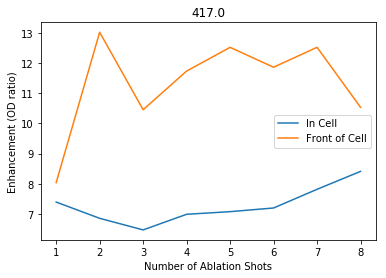

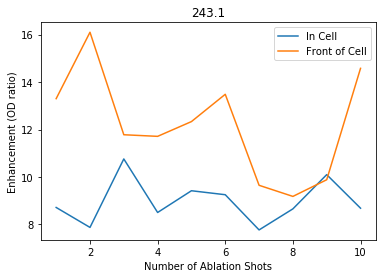

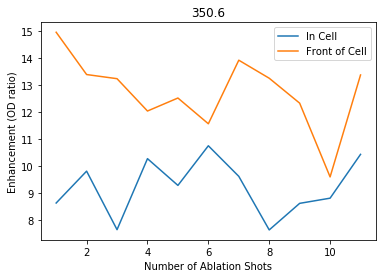

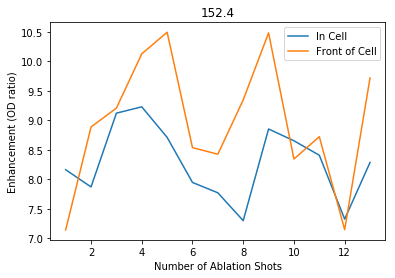

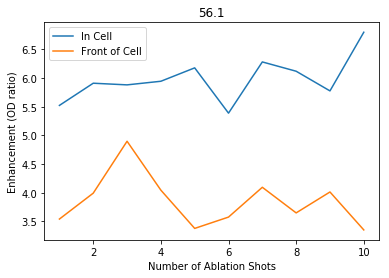

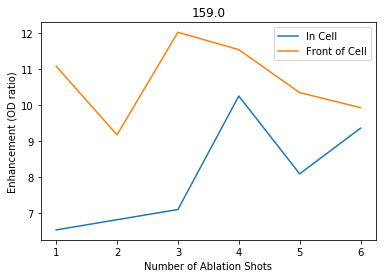

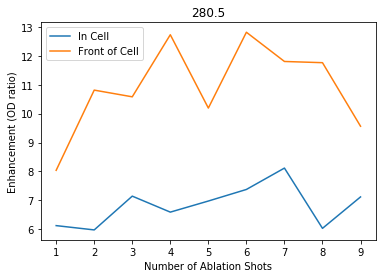

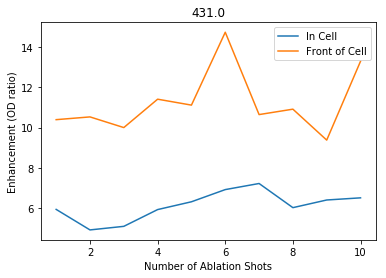

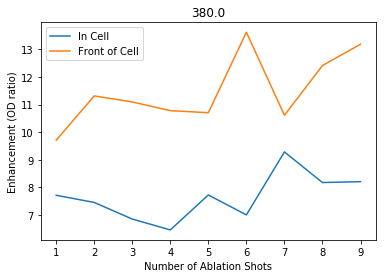

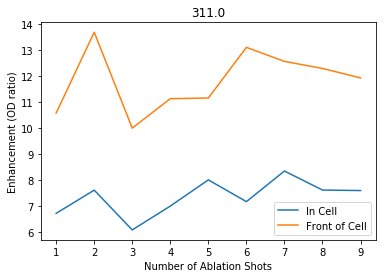

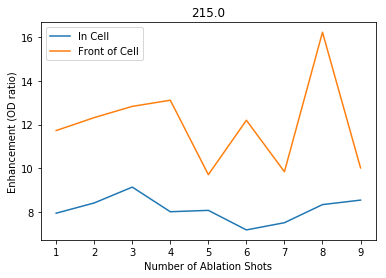

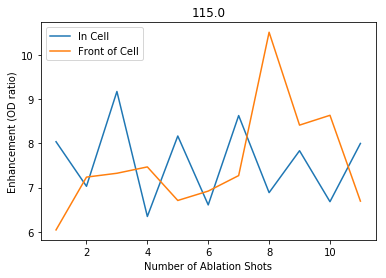

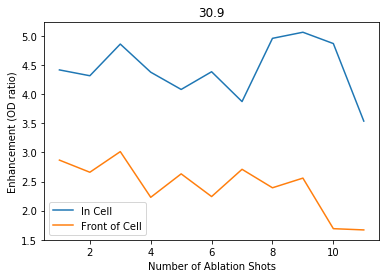

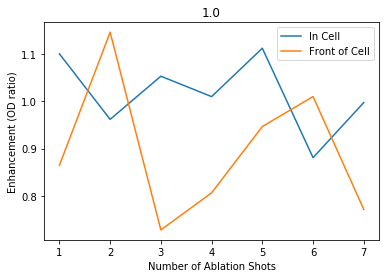

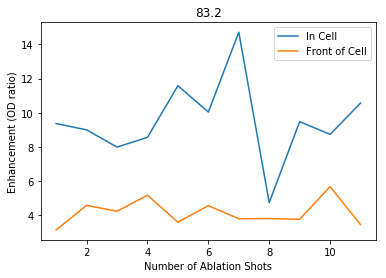

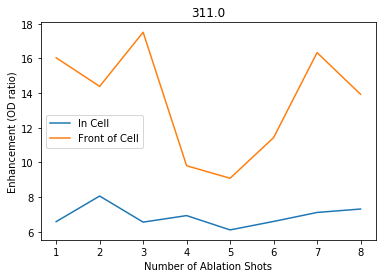

In [10]:
en_ch1 = []
en_ch2 = []
for _b,_ub in zip(b_int,ub_int):
    _en1 = calcEnhancement(_b[0],_ub[0])
    en_ch1.append(_en1[1:])
    _en2 = calcEnhancement(_b[1],_ub[1])
    en_ch2.append(_en2[1:])

cell = []
err_cell = []
front = []
err_front = []
for _en1,_en2,_iv in zip(en_ch1,en_ch2,iv):
    plt.figure()
    x = np.arange(1,len(_en1)+1)
    plt.title('{}'.format(_iv))
    plt.ylabel('Enhancement (OD ratio)')
    plt.xlabel('Number of Ablation Shots')
    plt.plot(x,_en1,label='In Cell')
    plt.plot(x,_en2,label='Front of Cell')
    plt.legend(loc='best')
    cell.append(np.array(_en1).mean())
    err_cell.append(np.array(_en1).std())
    front.append(np.array(_en2).mean())
    err_front.append(np.array(_en2).std())

In [11]:
cell1 = cell
err_cell1 = err_cell
front1 = front
err_front1 = err_front
iv1 = iv

In [17]:
en_cell_sort = np.array(sortData(iv,cell))
err_cell_sort = np.array(sortData(iv,err_cell))
en_front_sort = np.array(sortData(iv,front))
err_front_sort = np.array(sortData(iv,err_front))
iv_sort = np.array(sorted(iv))

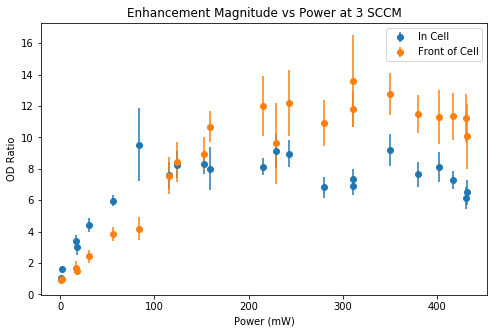

In [21]:
plt.figure(figsize=(8,5))
plt.title('Enhancement Magnitude vs Power at 3 SCCM')
plt.xlabel('Power (mW)')
plt.ylabel('OD Ratio')
plt.errorbar(iv_sort,en_cell_sort,yerr=err_cell_sort,marker='o',linestyle='None',label='In Cell')
plt.errorbar(iv_sort,en_front_sort,yerr=err_front_sort,marker='o',linestyle='None',label='Front of Cell')
plt.legend(loc='best')

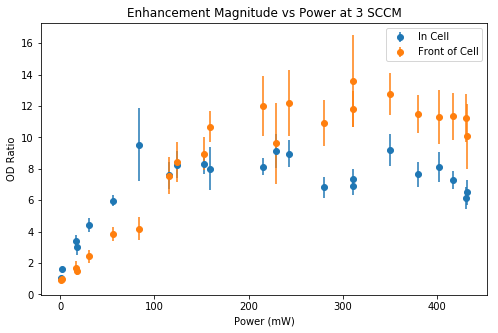

In [28]:
plt.figure(figsize=(8,5))
plt.title('Enhancement Magnitude vs Power at 3 SCCM')
plt.xlabel('Power (mW)')
plt.ylabel('OD Ratio')
plt.errorbar(iv,cell,yerr=err_cell,marker='o',linestyle='None',label='In Cell')
plt.errorbar(iv,front,yerr=err_front,marker='o',linestyle='None',label='Front of Cell')
plt.legend(loc='best')

In [28]:
def dopplerPowerExcitedFraction(I,N,T):
    Isat = 0.04626 #mW/cm^2
    gamma = 0.1823 #MHz
    doppler = 33.58*np.sqrt(T) #MHz/sqrt(Kelvin)
    s = I/Isat
    N_excited = N * s/np.sqrt(1+s) * gamma/doppler
    return 1+N_excited
def powerIntensity(ptot,d=0.3):
    #assuming gaussian beam
    #diameter d is in cm, ptot is in mW
    I = 2*ptot/(np.pi * (d/2)**2)
    return I #mW/cm^2
def fitDopplerPower(xscale,data,guess=[1,4],sigma=None,bounds=None,plot=True):
    bounds=([0,4],[np.inf,np.inf])
    function = dopplerPowerExcitedFraction
    params,error,residuals = fitFunction(xscale,data,function,guess,sigma,plot,bounds)
    return [params,error,residuals]

def voigtLineshape(x,lor_fwhm,gauss_stdev):
    max_value = voigt(x,lor_fwhm/2,gauss_stdev,0,1,0)
    return max_value
def voigtExcitedFraction(I,N):
    Isat = 0.04626 #mW/cm^2
    s = I/Isat
    lor_fwhm = 0.1823*np.sqrt(1+s) #MHz
    T=4
    gauss_stdev = 11.87 *np.sqrt(T) #MHz/sqrt(Kelvin)
    N_excited = np.zeros(len(I))
    for _lor,i in zip(lor_fwhm,range(len(I))):
        x,dx = np.linspace(-_lor/2,_lor/2,num=100,retstep=True)
        N_excited[i] = N * voigtLineshape(x,_lor,gauss_stdev).sum()*dx
    return N_excited
def voigtExcitedFraction2(I,N):
    Isat = 0.04626 #mW/cm^2
    s = I/Isat
    lor_fwhm = 0.1823*np.sqrt(1+s) #MHz
    T=4
    gauss_stdev = 11.87 *np.sqrt(T) #MHz/sqrt(Kelvin)
    N_excited = N * voigtLineshape(0,lor_fwhm,gauss_stdev)*lor_fwhm
    return 1+N_excited
def fitVoigtDopplerPower(xscale,data,guess=1,sigma=None,bounds=None,plot=True):
    function = 1+voigtExcitedFraction
    params,error,residuals = fitFunction(xscale,data,function,guess,sigma,plot,bounds)
    return [params,error,residuals]
def fitCrossSection(xscale,data,guess=[10,1],sigma=None,bounds=None,plot=True):
    function = excitedFraction
    bounds = ([0,0],[np.inf,np.inf])
    params,error,residuals = fitFunction(xscale,data,function,guess,sigma,plot,bounds)
    return [params,error,residuals]
def _voigt(x,lor,sig,mean=0,n=1,c=0): #lor = hwhm, sigma = gaussian stdev
    z= ((x-mean) + 1j*lor)/(sig*np.sqrt(2))
    value = n*np.real(wofz(z))/(sig*np.sqrt(2*np.pi))+c
    return value
def excitedFraction(I,N,a):
    Isat = 0.13878 #mW/cm^2
    s = I/Isat*a
    gamma = 1.145 #MHz*2pi
    lor_hwhm = gamma*np.sqrt(1+s)/2
    gauss_sig = 149.17/np.sqrt(4)*np.sqrt(7) #MHz*2pi
    rhoee = np.pi*(s/4)/np.sqrt(1+s)*gamma * _voigt(0,lor_hwhm,gauss_sig)
    return 1+N*rhoee
def voigtWidth(I,N,a,T):
    Isat = 0.13878 #mW/cm^2
    s = I/Isat*a
    gamma = 1.145 #MHz*2pi
    lor_hwhm = gamma*np.sqrt(1+s)/2
    gauss_sig = 149.17/np.sqrt(4)*np.sqrt(T) #MHz*2pi
    lorMHz = lor_hwhm/(2*np.pi)
    gaussMHz = gauss_sig/(2*np.pi)
    freqMHz = np.linspace(-500,500,num=10000)
    fwhm = []
    for lor in lorMHz:
        fwhm.append(findFWHM(freqMHz, _voigt(freqMHz,lor,gaussMHz)))
    fwhm = np.array(fwhm)
    stdev = fwhm/(2*np.sqrt(2*np.log(2)))
    return N*stdev
def fitVoigtWidth(xscale,data,guess=[4,1,4],sigma=None,bounds=None,plot=True):
    function = voigtWidth
    bounds = ([0,0,0],[np.inf,np.inf,30])
    params,error,residuals = fitFunction(xscale,data,function,guess,sigma,plot,bounds)
    return [params,error,residuals]

def findNearestIdx(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

def lorentzian(x,lor): #lor = hwhm
    f = 1/np.pi * lor/(x**2 + lor**2)
    return f

def gaussian(x,sig):
    f = 1/np.sqrt(2*np.pi*sig**2)*np.exp(-x**2/(2*sig**2))
    return f

def findFWHM(x,data):
    half_max = data.max()/2
    idx_max = np.argmax(data)
    data_L = data[0:idx_max]
    x_L = x[0:idx_max]
    data_R = data[idx_max:]
    x_R = x[idx_max:]
    half_L = x_L[findNearestIdx(data_L,half_max)]
    half_R = x_R[findNearestIdx(data_R,half_max)]
    FWHM = abs(half_R-half_L)
    return FWHM
    

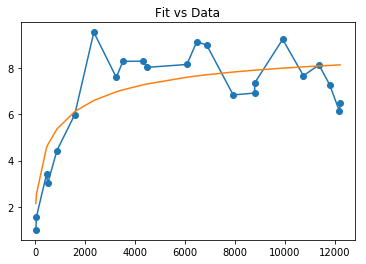

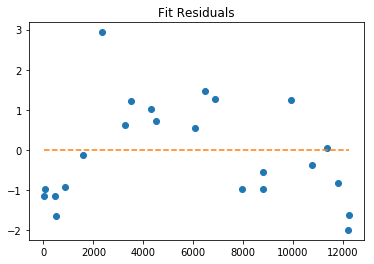

In [51]:
intensity_all = powerIntensity(iv_sort)
params,error,residuals=fitCrossSection(intensity_all,en_cell_sort)

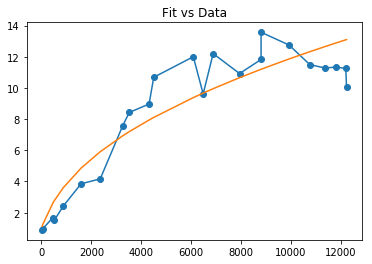

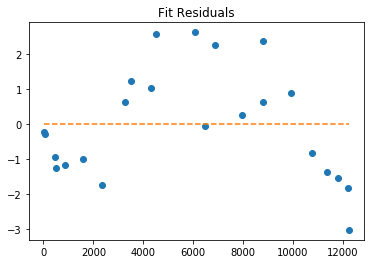

In [52]:
intensity_all = powerIntensity(iv_sort)
params,error,residuals=fitCrossSection(intensity_all,en_front_sort)

In [47]:
print(params)

[5.59386978e+02 2.53000000e-04 1.00000000e+00]


In [12]:
results=readCSVcolumns('Processed_20190424/metadata_enhancement_stoichiometric_0502.csv',skip_header=1)
header = results[1]
print(header)
[iv,starts,stops]= results[0]

Done! Array read from Processed_20190424/metadata_enhancement_stoichiometric_0502.csv
[['Power (mW)', 'Start', 'Stop']]


A Jupyter Widget

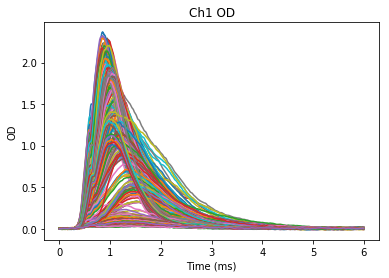

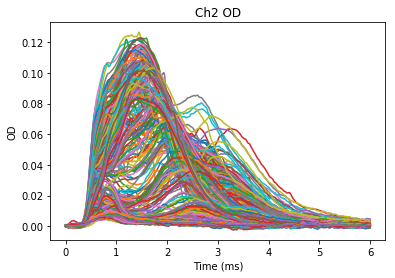

In [66]:
folder = '20190424'
skips = []
ABAB = True

start_arr = starts.astype(int)
stop_arr = stops.astype(int)
iv_arr = iv

enhancement = []

b_ODs = []
ub_ODs = []
b_int = []
ub_int = []

progress = widgets.FloatProgress(value=0.0, min=0.0, max=1.0)
display(progress)

for _start,_stop,i in zip(start_arr,stop_arr,range(0,len(start_arr)*3,3)):
    
    ODs_1 = calculateSeriesOD(folder,_start,_stop,skips,ABAB=ABAB)
    int_1 = processData(ODs_1,[0,6])
    progress.value = float(i/(len(start_arr)*3))
    i+=1
    ODs_2 = calculateSeriesOD(folder,_start+1,_stop,skips,ABAB=ABAB)
    int_2 = processData(ODs_2,[0,6])
    progress.value = float(i/(len(start_arr)*3))
    i+=1
    b,ub,firstBlocked = identifyBUB(int_1,int_2,ch=1,equal=True,returnBool=True)
    b_int.append(b)
    ub_int.append(ub)
    if firstBlocked:
        b_ODs.append(ODs_1)
        ub_ODs.append(ODs_2)
    else:
        b_ODs.append(ODs_2)
        ub_ODs.append(ODs_1)
    progress.value = float(i/(len(start_arr)*3))
    i+=1
progress.value=1

#ODs = [Ch1 ODs, Ch 2 ODs, params]
#int = [Ch1 Integrated, Ch2 Integrated, Timestamp]

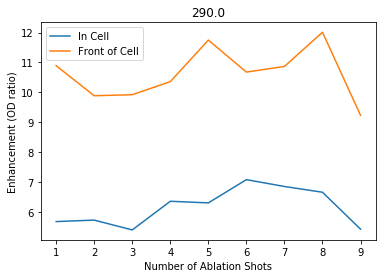

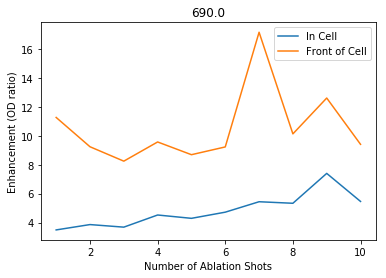

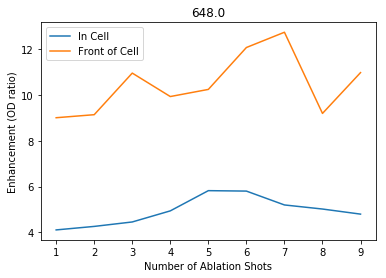

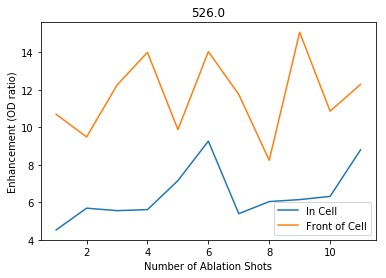

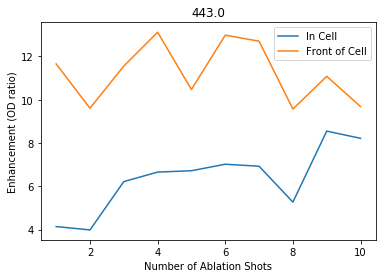

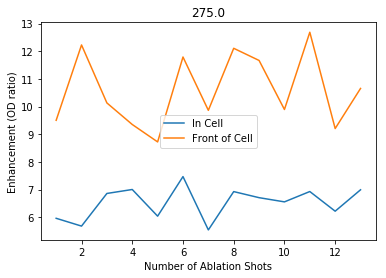

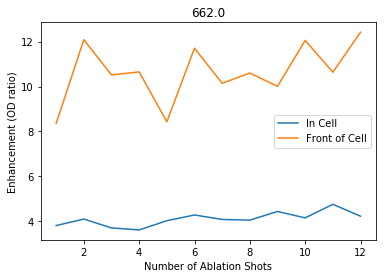

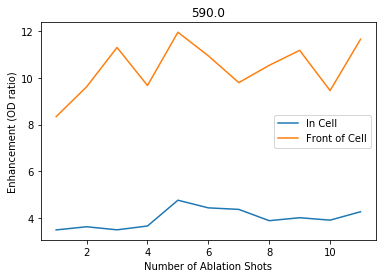

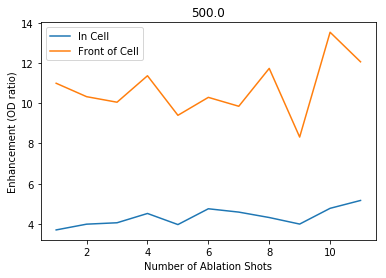

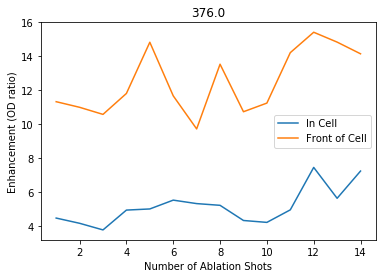

In [4]:
en_ch1 = []
en_ch2 = []
for _b,_ub in zip(b_int,ub_int):
    _en1 = calcEnhancement(_b[0],_ub[0])
    en_ch1.append(_en1[1:])
    _en2 = calcEnhancement(_b[1],_ub[1])
    en_ch2.append(_en2[1:])

cell = []
err_cell = []
front = []
err_front = []
for _en1,_en2,_iv in zip(en_ch1,en_ch2,iv):
    plt.figure()
    x = np.arange(1,len(_en1)+1)
    plt.title('{}'.format(_iv))
    plt.ylabel('Enhancement (OD ratio)')
    plt.xlabel('Number of Ablation Shots')
    plt.plot(x,_en1,label='In Cell')
    plt.plot(x,_en2,label='Front of Cell')
    plt.legend(loc='best')
    cell.append(np.array(_en1).mean())
    err_cell.append(np.array(_en1).std())
    front.append(np.array(_en2).mean())
    err_front.append(np.array(_en2).std())

In [5]:
cell2 = cell
err_cell2 = err_cell
front2 = front
err_front2 = err_front

In [13]:
iv2 = iv

In [17]:
lbls = ['Power (mW)','In Cell Enhancement','In Cell StDev','Front of Cell Enhancement','Front of Cell StDev']
data = np.array([np.array(iv2),np.array(cell2),np.array(err_cell2),np.array(front2),np.array(err_front2)])
save_all = []
save_all.append(lbls)
for _data in data.T:
    save_all.append(_data)
writeCSVrows(save_all,'Processed_20190424/Enhancement_vs_Power_YAG865V_3SCCM_SpecWindowBounce_0502.csv')

Done! Array written to Processed_20190424/Enhancement_vs_Power_YAG865V_3SCCM_SpecWindowBounce_0502.csv


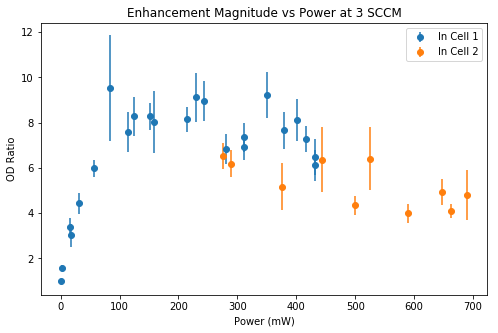

In [21]:
plt.figure(figsize=(8,5))
plt.title('Enhancement Magnitude vs Power at 3 SCCM')
plt.xlabel('Power (mW)')
plt.ylabel('OD Ratio')
plt.errorbar(iv1,cell1,yerr=err_cell1,marker='o',linestyle='None',label='In Cell 1')
plt.errorbar(iv2,cell2,yerr=err_cell2,marker='o',linestyle='None',label='In Cell 2')
plt.legend(loc='best')

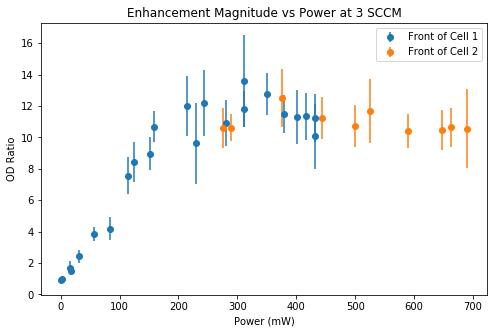

In [22]:
plt.figure(figsize=(8,5))
plt.title('Enhancement Magnitude vs Power at 3 SCCM')
plt.xlabel('Power (mW)')
plt.ylabel('OD Ratio')
plt.errorbar(iv1,front1,yerr=err_front1,marker='o',linestyle='None',label='Front of Cell 1')
plt.errorbar(iv2,front2,yerr=err_front2,marker='o',linestyle='None',label='Front of Cell 2')
plt.legend(loc='best')

In [26]:
power = np.concatenate((np.array(iv1),np.array(iv2)))
cell = np.concatenate((np.array(cell1),np.array(cell2)))
front = np.concatenate((np.array(front1),np.array(front2)))
err_cell = np.concatenate((np.array(err_cell1),np.array(err_cell2)))
err_front = np.concatenate((np.array(err_front1),np.array(err_front2)))
en_cell_sort = np.array(sortData(power,cell))
err_cell_sort = np.array(sortData(power,err_cell))
en_front_sort = np.array(sortData(power,front))
err_front_sort = np.array(sortData(power,err_front))
power_sort = np.array(sorted(power))

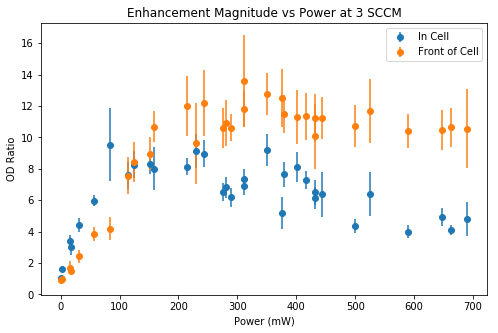

In [27]:
plt.figure(figsize=(8,5))
plt.title('Enhancement Magnitude vs Power at 3 SCCM')
plt.xlabel('Power (mW)')
plt.ylabel('OD Ratio')
plt.errorbar(power_sort,en_cell_sort,yerr=err_cell_sort,marker='o',linestyle='None',label='In Cell')
plt.errorbar(power_sort,en_front_sort,yerr=err_front_sort,marker='o',linestyle='None',label='Front of Cell')
plt.legend(loc='best')

[33.762256  1.002929]


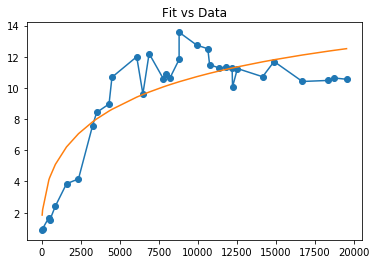

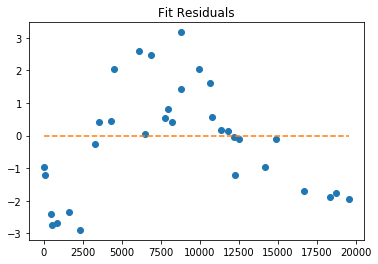

In [33]:
intensity_all = powerIntensity(power_sort)
params,error,residuals=fitCrossSection(intensity_all,en_front_sort)
print(params)

[12.208557 29.196035]


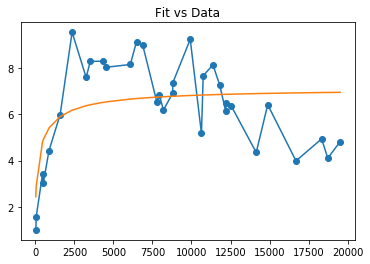

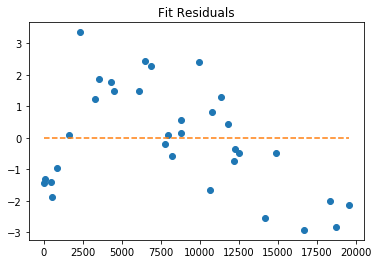

In [35]:
intensity_all = powerIntensity(power_sort)
params,error,residuals=fitCrossSection(intensity_all,en_cell_sort)
print(params)

In [37]:
lbls = ['Power (mW)','In Cell Enhancement','In Cell StDev','Front of Cell Enhancement','Front of Cell StDev']
data = np.array([np.array(power_sort),np.array(en_cell_sort),np.array(err_cell_sort),np.array(en_front_sort),np.array(err_front_sort)])
save_all = []
save_all.append(lbls)
for _data in data.T:
    save_all.append(_data)
writeCSVrows(save_all,'Processed_20190424/Enhancement_vs_Power_YAG865V_3SCCM_SpecWindowBounce_all.csv')

Done! Array written to Processed_20190424/Enhancement_vs_Power_YAG865V_3SCCM_SpecWindowBounce_all.csv
